In [1]:
import pandas as pd
from scipy.stats import mode
import h3
import seaborn as sns
import matplotlib.pyplot as plt


In [109]:
import os

pd.set_option('display.precision', 1)

In [3]:
os.chdir('Data')

In [99]:
trawlers = pd.read_csv('trawlers.csv')
drifting_longlines = pd.read_csv('drifting_longlines.csv')
trollers = pd.read_csv('trollers.csv')
unknown = pd.read_csv('unknown.csv')
pole_and_line = pd.read_csv('pole_and_line.csv')
fixed_gear = pd.read_csv('fixed_gear.csv')
purse_seines = pd.read_csv('purse_seines.csv')

In [5]:
trawlers.head(1)

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.252340e+12,1.325376e+09,0.0,0.0,0.0,153.0,52.458649,4.5812,-1.0,gfw


In [100]:
trawlers['ship_type'] = 'trawlers'
drifting_longlines['ship_type'] = 'drifting_longlines'
trollers['ship_type'] = 'trollers'
unknown['ship_type'] = 'unknown'
pole_and_line['ship_type'] = 'pole_and_line'
fixed_gear['ship_type'] = 'fixed_gear'
purse_seines['ship_type'] = 'purse_seines'

In [101]:
trawlers.head(2)

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,ship_type
0,1.252340e+12,1.325376e+09,0.0,0.0,0.0,153.0,52.458649,4.581200,-1.0,gfw,trawlers
1,1.252340e+12,1.325378e+09,0.0,0.0,0.0,153.0,52.458668,4.581167,-1.0,gfw,trawlers


In [9]:
drifting_longlines.head()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,ship_type
0,1.263956e+13,1.327137e+09,232994.281250,311748.65625,8.2,230.500000,14.865583,-26.853662,-1.0,dalhousie_longliner,drifting_longlines
1,1.263956e+13,1.327137e+09,233994.265625,312410.34375,7.3,238.399994,14.863870,-26.856800,-1.0,dalhousie_longliner,drifting_longlines
2,1.263956e+13,1.327137e+09,233994.265625,312410.34375,6.8,238.899994,14.861551,-26.860649,-1.0,dalhousie_longliner,drifting_longlines
3,1.263956e+13,1.327143e+09,233994.265625,315417.37500,6.9,251.800003,14.822686,-26.865898,-1.0,dalhousie_longliner,drifting_longlines
4,1.263956e+13,1.327143e+09,233996.390625,316172.56250,6.1,231.100006,14.821825,-26.867579,-1.0,dalhousie_longliner,drifting_longlines


In [9]:
trollers.head()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,ship_type
0,7.652701e+13,1.337836e+09,0.0,3162.200195,0.0,0.000000,51.887592,4.356583,-1.0,gfw,trollers
1,7.652701e+13,1.338199e+09,0.0,4999.877441,0.0,0.000000,51.242130,4.403008,-1.0,gfw,trollers
2,7.652701e+13,1.343752e+09,0.0,66308.250000,8.6,292.200012,51.960873,5.196125,-1.0,gfw,trollers
3,7.652701e+13,1.350795e+09,0.0,15296.682617,0.0,0.000000,51.231094,4.526647,-1.0,gfw,trollers
4,7.652701e+13,1.351808e+09,0.0,15296.682617,0.0,0.000000,51.231098,4.526487,-1.0,gfw,trollers


In [102]:
df_2s = [trawlers, drifting_longlines, trollers, unknown, pole_and_line, fixed_gear, purse_seines]

# Concatenate all dataframes in the list along the rows
df_2 = pd.concat(df_2s, ignore_index=True)

In [105]:
df_2.columns

Index(['mmsi', 'timestamp', 'distance_from_shore', 'distance_from_port',
       'speed', 'course', 'lat', 'lon', 'is_fishing', 'source', 'ship_type'],
      dtype='object')

In [10]:
del df_2s, trawlers, drifting_longlines, trollers, unknown, pole_and_line, fixed_gear, purse_seines

In [107]:
df_2.shape

(28581398, 11)

In [108]:
df_2[df_2['is_fishing']>0].shape

(257876, 11)

In [43]:
df_2[df_2_2_2_2['is_fishing']==-1].shape

(28027543, 11)

In [19]:
df_2[df_2['is_fishing']>0.5].shape

(253089, 10)

In [48]:
df_2[['is_fishing']].describe([0.01,0.05,0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

,is_fishing
count,2.858140e+07
mean,-9.717758e-01
std,2.122279e-01
min,-1.000000e+00
1%,-1.000000e+00
5%,-1.000000e+00
10%,-1.000000e+00
25%,-1.000000e+00
50%,-1.000000e+00
75%,-1.000000e+00


(553855, 25)

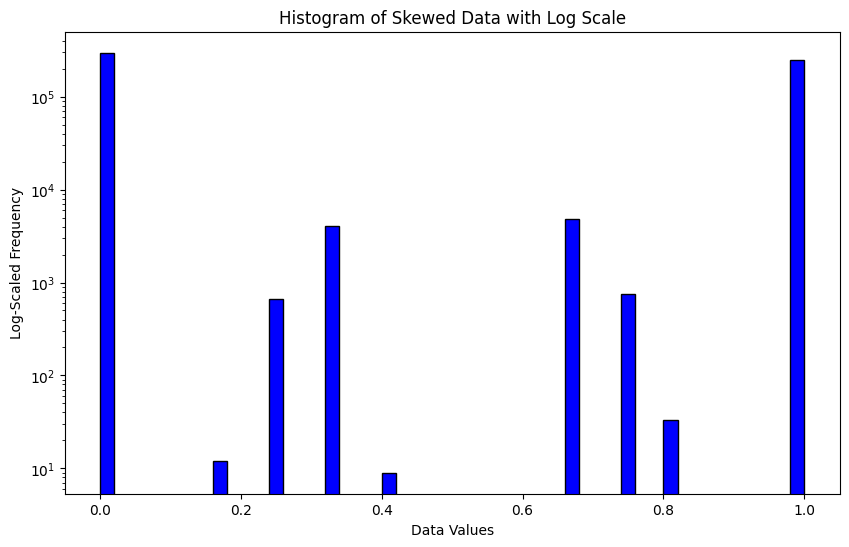

In [51]:
df_2[df_2['is_fishing']>0][['is_fishing']].describe([0.01,0.05,0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.99])

,is_fishing
count,257876.000000
mean,0.980436
std,0.102182
min,0.166667
1%,0.333333
5%,1.000000
10%,1.000000
25%,1.000000
50%,1.000000
75%,1.000000


### Feature Generation 

In [13]:
df_2['timestamp'] = pd.to_datetime(df_2['timestamp'],unit='s')

# Extract hour, day, month, and year into separate columns
df_2['hour'] = df_2['timestamp'].dt.hour
df_2['day'] = df_2['timestamp'].dt.day
df_2['month'] = df_2['timestamp'].dt.month
df_2['year'] = df_2['timestamp'].dt.year

In [14]:
df_2['timestamp'].iloc[0]

Timestamp('2012-01-01 00:00:38')

In [ ]:
## Time bilgileri 
## Lat Lon'a göre mevsim
##  Distance from port and shore corr
## Hotspot analysis (Farklı çözünürlük seviyesi)
### 

In [15]:
df_2.head(2)

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,ship_type,hour,day,month,year
0,1.252340e+12,2012-01-01 00:00:38,0.0,0.0,0.0,153.0,52.458649,4.581200,-1.0,gfw,trawlers,0,1,1,2012
1,1.252340e+12,2012-01-01 00:33:13,0.0,0.0,0.0,153.0,52.458668,4.581167,-1.0,gfw,trawlers,0,1,1,2012


In [16]:
resolution = 7
df_2['hexagon_coordi'] = df_2.apply(lambda row: h3.geo_to_h3(row['lat'], row['lon'], resolution), axis=1)


In [24]:
resolution = 3
df_2['hexagon_coordi_3'] = df_2.apply(lambda row: h3.geo_to_h3(row['lat'], row['lon'], resolution), axis=1)

In [26]:

df_2.columns = df_2.columns.str.replace('hexagon_coordi', 'hexagon_coordi_7')


In [27]:
df_2.head(2)

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,ship_type,hour,day,month,year,hexagon_coordi_7,hexagon_coordi_7_3
0,1.252340e+12,2012-01-01 00:00:38,0.0,0.0,0.0,153.0,52.458649,4.581200,-1.0,gfw,trawlers,0,1,1,2012,87196820affffff,831968fffffffff
1,1.252340e+12,2012-01-01 00:33:13,0.0,0.0,0.0,153.0,52.458668,4.581167,-1.0,gfw,trawlers,0,1,1,2012,87196820affffff,831968fffffffff


In [18]:
df_2.to_csv('global_fishing_data.csv')

In [28]:
df_2_2 = df_2[df_2['is_fishing']>=0]

In [29]:
df_2_2.to_csv('global_fishing_data_1.csv')

In [ ]:
df_2_2

In [34]:
display(df_2_2['course'].value_counts())
display(df_2_2['course'].describe())

course
0.000000      29079
360.000000     5614
357.600006     5190
126.300003     1458
281.000000     1134
              ...  
148.300003       66
142.600006       65
152.699997       65
40.799999        64
146.600006       64
Name: count, Length: 3602, dtype: int64

count    553853.000000
mean        180.697572
std         111.229785
min           0.000000
25%          85.000000
50%         185.399994
75%         276.000000
max         511.000000
Name: course, dtype: float64

In [41]:
df_2_2['ship_type'].mode()

0    drifting_longlines
Name: ship_type, dtype: object

In [42]:
def get_pandas_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None
# Corrected groupby and aggregation
df_2_result = df_2_2.groupby('hexagon_coordi_7_3')[['course', 'is_fishing', 'ship_type', 'speed']].agg({'course': get_pandas_mode,'is_fishing': 'mean','ship_type': get_pandas_mode,'speed': 'mean'})


In [50]:
df_2_2 = df_2_2.merge(df_2_result,how='left',on='hexagon_coordi_7_3',suffixes=['','_hex_level_3_avg'])

In [52]:
df_2_result_2 = df_2_2.groupby('hexagon_coordi_7')[['course', 'is_fishing', 'ship_type', 'speed']].agg({'course': get_pandas_mode,'is_fishing': 'mean','ship_type': get_pandas_mode,'speed': 'mean'})


In [53]:
df_2_2 = df_2_2.merge(df_2_result_2,how='left',on='hexagon_coordi_7',suffixes=['','_hex_level_7_avg'])

In [55]:
df_2_2.to_csv('global_fishing_data_1.csv')

### Exp. Data Analysis

In [110]:
df_2_2 = pd.read_csv('global_fishing_data_1.csv')
df_2_2.drop('Unnamed: 0',axis=1,inplace=True)

In [132]:
print('Breakdown of Ship Type After Exluding -1 Values')
pd.DataFrame(df_2_2[['ship_type']].value_counts())

Breakdown of Ship Type After Exluding -1 Values


,count
ship_type,
drifting_longlines,219741
trawlers,177394
unknown,79918
fixed_gear,41858
purse_seines,22849
trollers,7845
pole_and_line,4250


In [156]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

array([0.48873491, 0.23832116, 0.1528652 , 0.05455076, 0.05406744,
       0.00581648, 0.00564406])

In [165]:

pd.set_option('display.precision', 2)

In [172]:
print('Breakdown of Ship Type Before Excluding -1 Values')
temp = pd.DataFrame(df_2[['ship_type']].value_counts())
temp['%'] = (df_2[['ship_type']].value_counts().values / df_2.shape[0])
temp.to_excel('without_excluding_minus_1_values.xlsx')

Breakdown of Ship Type Before Excluding -1 Values


In [171]:
print('Breakdown of Ship Type After Excluding -1 Values')
temp = pd.DataFrame(df_2_2[['ship_type']].value_counts())
temp['%'] = (df_2_2[['ship_type']].value_counts().values / df_2_2.shape[0])*100
temp.to_excel('excluding_minus_1_values.xlsx')

Breakdown of Ship Type After Excluding -1 Values


In [121]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [119]:
import numpy as np
def percentile_95(x):
    return np.percentile(x, 95)
def percentile_5(x):
    return np.percentile(x, 5)

In [125]:
display(df_2_2.groupby('ship_type')[['distance_from_shore']].agg([percentile_5,'mean','median',percentile_95,'max']))
display(df_2_2.groupby('ship_type')[['distance_from_port',]].agg([percentile_5,'mean','median',percentile_95,'max']))
display(df_2_2.groupby('ship_type')[['speed']].agg([percentile_5,'mean','median',percentile_95,'max']))

distance_from_shore                                  \
                          percentile_5     mean   median percentile_95   
ship_type                                                                
drifting_longlines                 0.0 511383.3 417938.3     1475880.1   
fixed_gear                         0.0  23141.3      0.0       94598.7   
pole_and_line                      0.0  11255.3      0.0       38048.4   
purse_seines                       0.0 182392.6   4123.0      966978.0   
trawlers                           0.0 186701.0   3999.9     1145836.4   
trollers                           0.0  17620.1   1000.0       66406.2   
unknown                            0.0 151997.6   6324.4     1615653.4   

                              
                         max  
ship_type                     
drifting_longlines 2185458.0  
fixed_gear         1448151.2  
pole_and_line       837414.2  
purse_seines       1985473.4  
trawlers           2853625.2  
trollers             94258.0  
unknown            2186113.8

distance_from_port                                  \
                         percentile_5     mean   median percentile_95   
ship_type                                                               
drifting_longlines             2236.0 702143.3 569942.1     1839280.8   
fixed_gear                     1000.0  44195.1  26248.2      117644.9   
pole_and_line                  2000.0  37041.8  25238.2       89955.5   
purse_seines                   1000.0 269030.4  34712.3     1178921.9   
trawlers                       1000.0 274428.9  55324.9     1511329.5   
trollers                       1414.2  28822.2   8062.1       93340.1   
unknown                        1000.0 227003.3  50357.5     2003161.5   

                              
                         max  
ship_type                     
drifting_longlines 3117979.0  
fixed_gear         1472928.6  
pole_and_line       858397.2  
purse_seines       2623922.2  
trawlers           3836963.2  
trollers            117644.9  
unknown            2845082.2

speed                                
                   percentile_5 mean median percentile_95   max
ship_type                                                      
drifting_longlines          0.0  5.7    5.7          11.2 102.3
fixed_gear                  0.0  1.8    0.0           8.6 102.3
pole_and_line               0.0  2.7    0.3          10.6  15.2
purse_seines                0.0  4.2    0.6          13.5  16.4
trawlers                    NaN  2.9    1.4           NaN 102.3
trollers                    0.0  2.5    0.7           8.3  13.2
unknown                     0.0  2.6    1.0           9.5  64.2

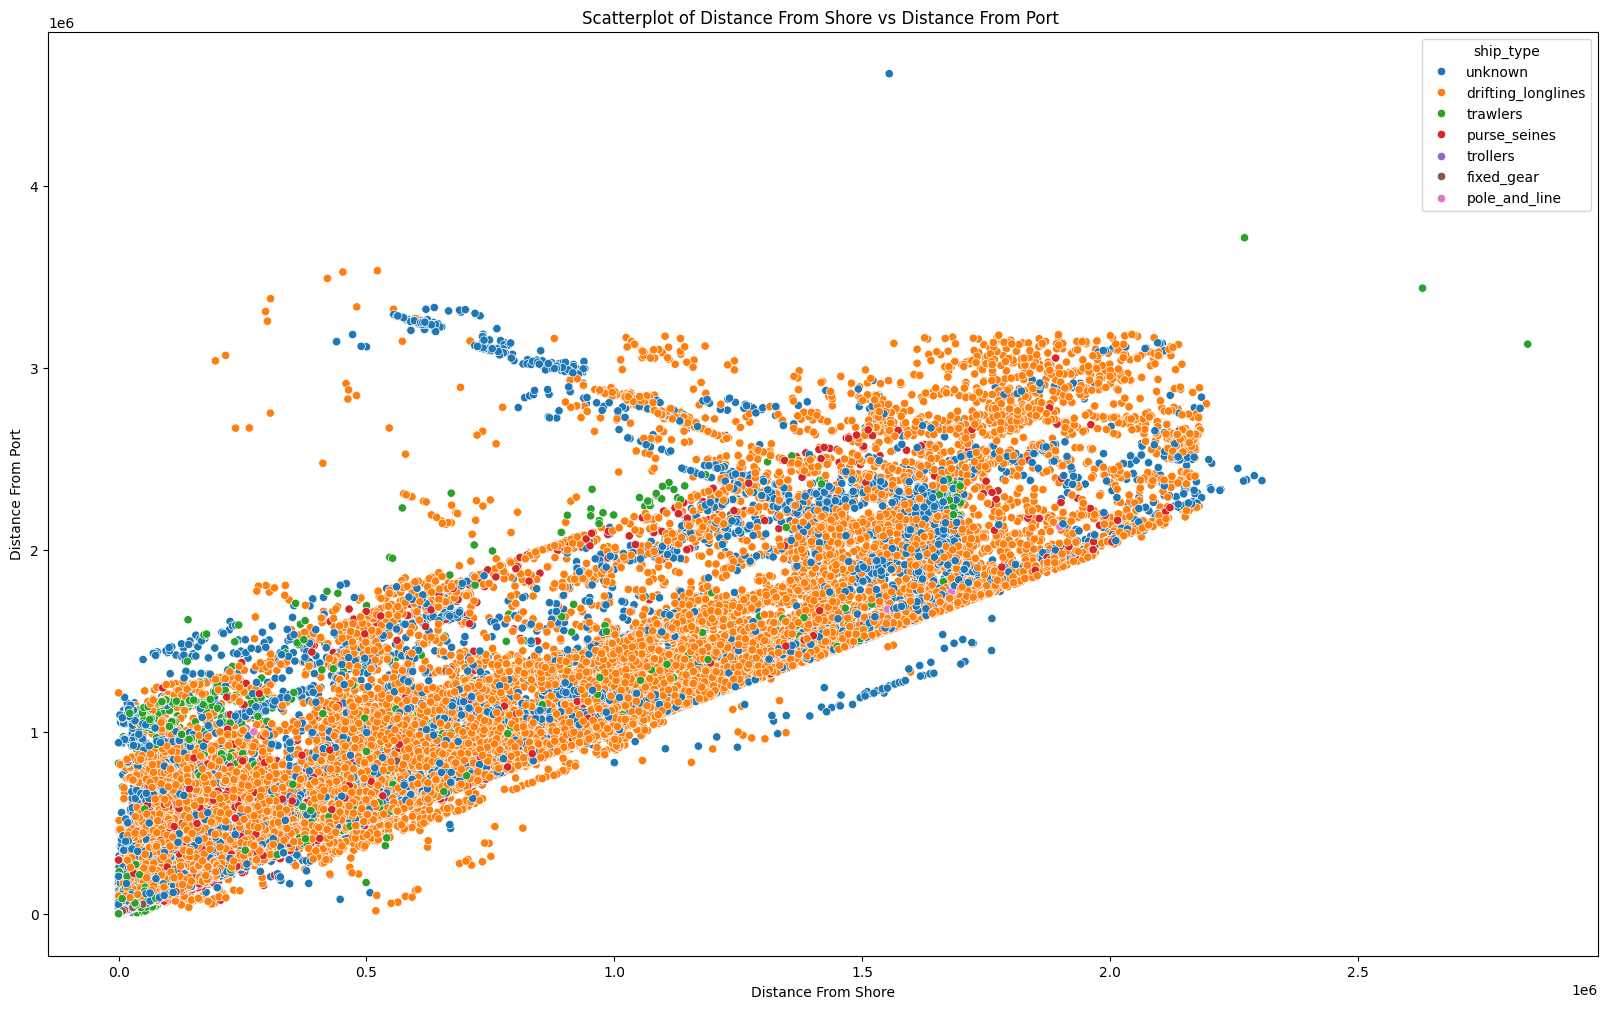

In [128]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='distance_from_shore', y='distance_from_port', hue='ship_type', data=df_2.sample(100000))
plt.title('Scatterplot of Distance From Shore vs Distance From Port ')
plt.xlabel('Distance From Shore')
plt.ylabel('Distance From Port')
plt.show()

In [129]:
df_2_2.shape

(553855, 25)

In [60]:
df_2_2.groupby('ship_type')[['is_fishing']].agg({'is_fishing':'mean'})

,is_fishing
ship_type,
drifting_longlines,0.633631
fixed_gear,0.269791
pole_and_line,0.217737
purse_seines,0.127766
trawlers,0.356886
trollers,0.388655
unknown,0.401661


In [145]:
df_2_2.timestamp = pd.to_datetime(df_2_2.timestamp)

In [142]:
df_2_2['month']

0          1
1          1
2          1
3          1
4          1
          ..
553850    10
553851    10
553852    10
553853    10
553854    10
Name: month, Length: 553855, dtype: int64

In [144]:
df_2['timestamp']

0          1970-01-01 00:00:01.325376038
1          1970-01-01 00:00:01.325377993
2          1970-01-01 00:00:01.325378594
3          1970-01-01 00:00:01.325379595
4          1970-01-01 00:00:01.325380560
                        ...             
28581393   1970-01-01 00:00:01.480029519
28581394   1970-01-01 00:00:01.480029568
28581395   1970-01-01 00:00:01.480029579
28581396   1970-01-01 00:00:01.480029639
28581397   1970-01-01 00:00:01.480029669
Name: timestamp, Length: 28581398, dtype: datetime64[ns]

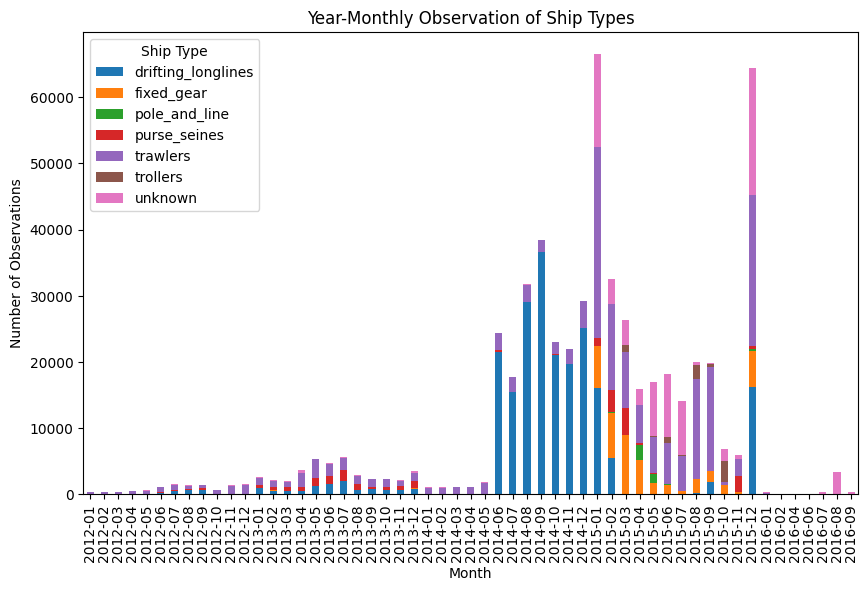

In [150]:
# Group by month and ship_type, and count occurrences
yearly_data = df_2_2.groupby([df_2_2['timestamp'].dt.to_period('M'), 'ship_type']).size().unstack(fill_value=0)

# Plot the data
yearly_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Year-Monthly Observation of Ship Types')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(rotation=90)
plt.legend(title='Ship Type')
plt.show()


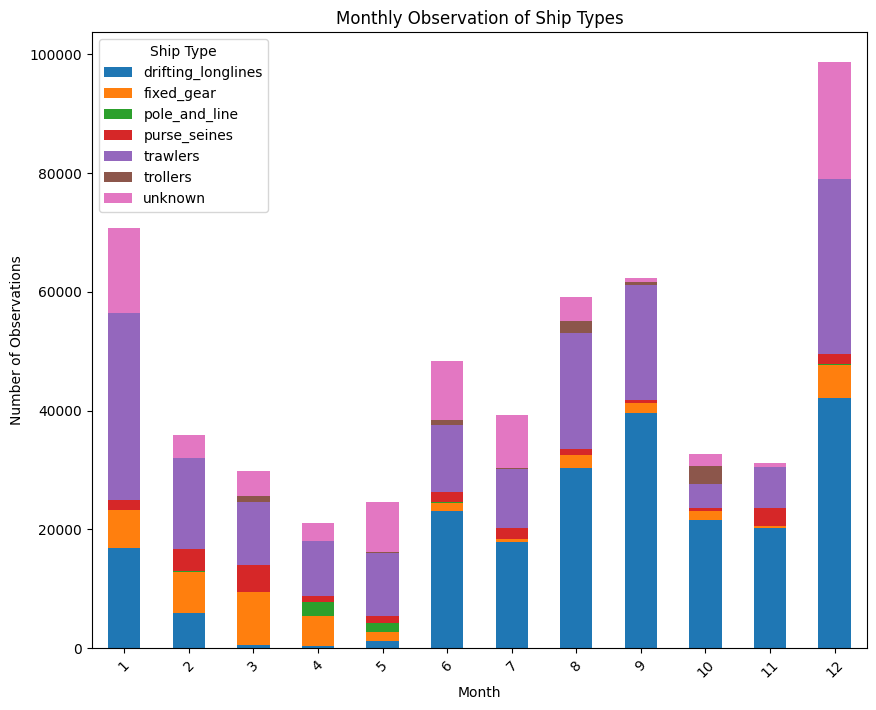

In [151]:
# Group by month and ship_type, and count occurrences
yearly_data = df_2_2.groupby([df_2_2['month'], 'ship_type']).size().unstack(fill_value=0)

# Plot the data
yearly_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Monthly Observation of Ship Types')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Ship Type')
plt.show()


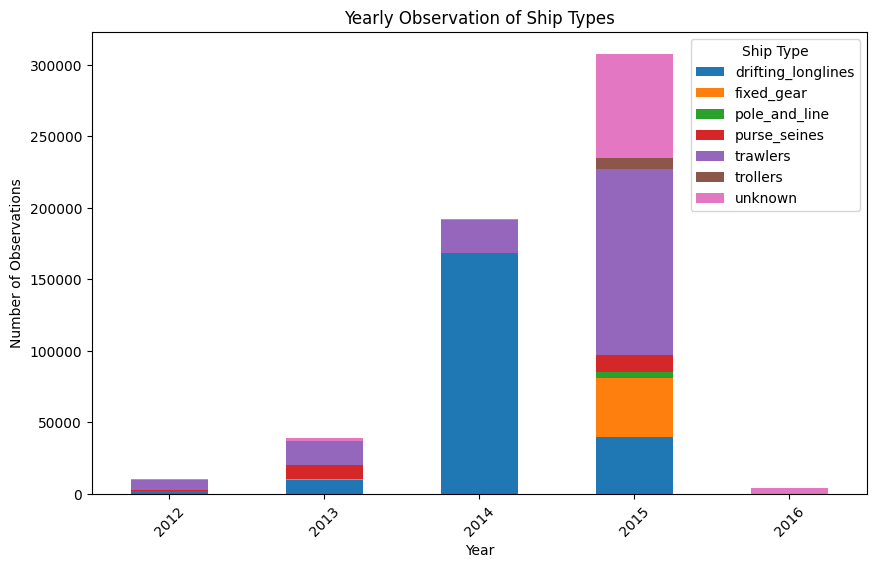

In [152]:
# Group by month and ship_type, and count occurrences
yearly_data = df_2_2.groupby([df_2_2['year'], 'ship_type']).size().unstack(fill_value=0)

# Plot the data
yearly_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yearly Observation of Ship Types')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Ship Type')
plt.show()


In [28]:
numerical_columns = ['distance_from_shore','distance_from_port','speed','is_fishing']

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,...,hexagon_coordi_7,hexagon_coordi_7_3,course_hex_level_3_avg,is_fishing_hex_level_3_avg,ship_type_hex_level_3_avg,speed_hex_level_3_avg,course_hex_level_7_avg,is_fishing_hex_level_7_avg,ship_type_hex_level_7_avg,speed_hex_level_7_avg
404980,183307128826540.0,2014-07-21 12:42:59,0.0,25079.3,0.0,289.0,31.2,130.6,0.0,crowd_sourced,...,874b71c14ffffff,834b71fffffffff,64.4,0.0,unknown,3.6,179.8,0.0,unknown,0.0
404981,183307128826540.0,2014-07-21 13:13:02,0.0,25079.3,0.0,179.8,31.2,130.6,0.0,crowd_sourced,...,874b71c14ffffff,834b71fffffffff,64.4,0.0,unknown,3.6,179.8,0.0,unknown,0.0
404982,183307128826540.0,2014-07-21 14:37:02,0.0,25079.3,0.0,323.7,31.2,130.6,0.0,crowd_sourced,...,874b71c14ffffff,834b71fffffffff,64.4,0.0,unknown,3.6,179.8,0.0,unknown,0.0
404983,183307128826540.0,2014-07-21 15:48:59,0.0,25079.3,0.0,313.7,31.2,130.6,0.0,crowd_sourced,...,874b71c14ffffff,834b71fffffffff,64.4,0.0,unknown,3.6,179.8,0.0,unknown,0.0
404984,183307128826540.0,2014-07-21 21:25:01,0.0,25079.3,0.0,297.6,31.2,130.6,0.0,crowd_sourced,...,874b71c14ffffff,834b71fffffffff,64.4,0.0,unknown,3.6,179.8,0.0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484893,269896480384592.0,2015-12-29 14:29:51,0.0,55071.3,0.0,0.0,43.3,13.7,1.0,gfw,...,871e858ccffffff,831e85fffffffff,0.0,0.7,unknown,5.2,0.0,1.0,unknown,1.3
484894,269896480384592.0,2015-12-29 14:46:08,0.0,55071.3,0.0,0.0,43.3,13.7,1.0,gfw,...,871e858ccffffff,831e85fffffffff,0.0,0.7,unknown,5.2,0.0,1.0,unknown,1.3
484895,269896480384592.0,2015-12-29 15:02:30,0.0,55071.3,0.0,0.0,43.3,13.7,1.0,gfw,...,871e858ccffffff,831e85fffffffff,0.0,0.7,unknown,5.2,0.0,1.0,unknown,1.3
484896,269896480384592.0,2015-12-29 15:18:29,0.0,55071.3,0.0,0.0,43.3,13.7,1.0,gfw,...,871e858ccffffff,831e85fffffffff,0.0,0.7,unknown,5.2,0.0,1.0,unknown,1.3


********trawlers********


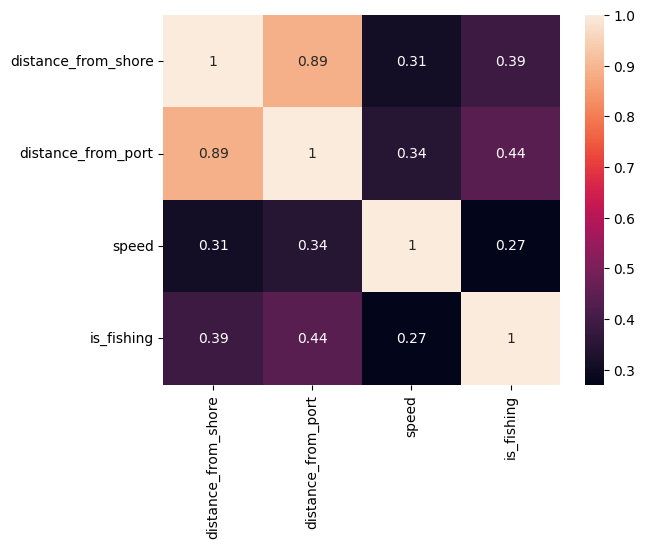

********drifting_longlines********


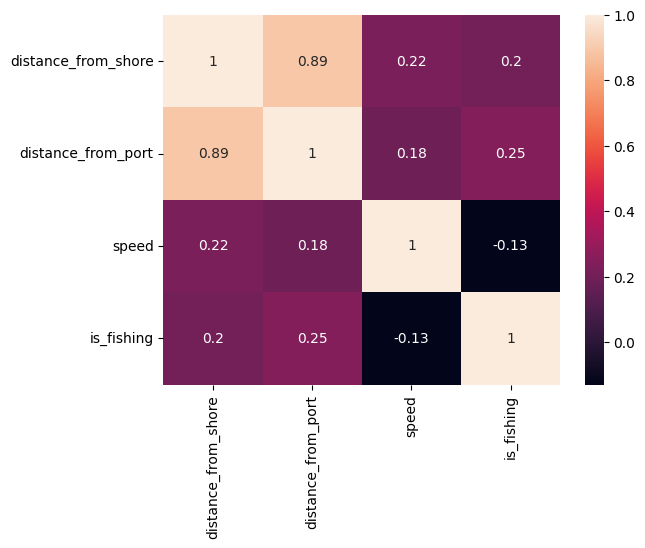

********trollers********


ValueError: Cannot take a larger sample than population when 'replace=False'

In [184]:
for i in df_2_2['ship_type'].unique():
    print(f'********{i}********')
    sns.heatmap(df_2_2[df_2_2['ship_type']==i].sample(10000)[numerical_columns].corr(),annot=True)
    plt.show()

<Axes: >

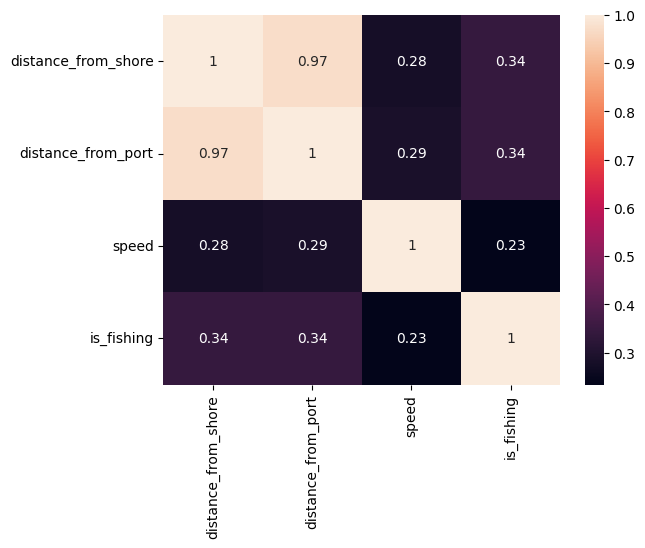

<Axes: >

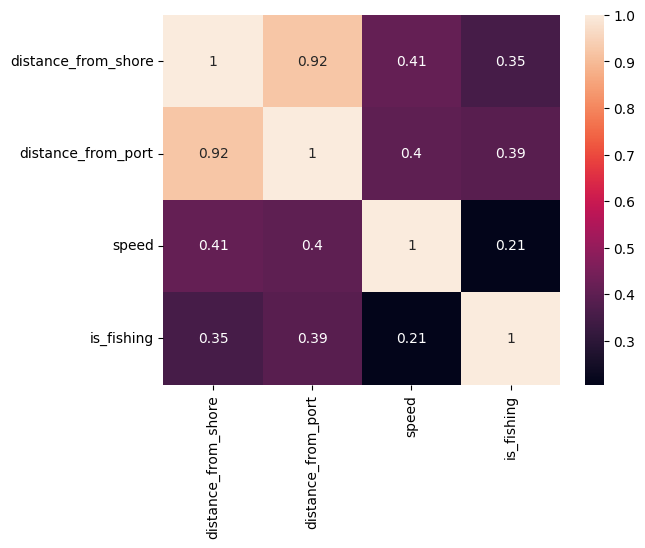

In [31]:
sns.heatmap(df_2.sample(1000)[numerical_columns].corr(),annot=True)

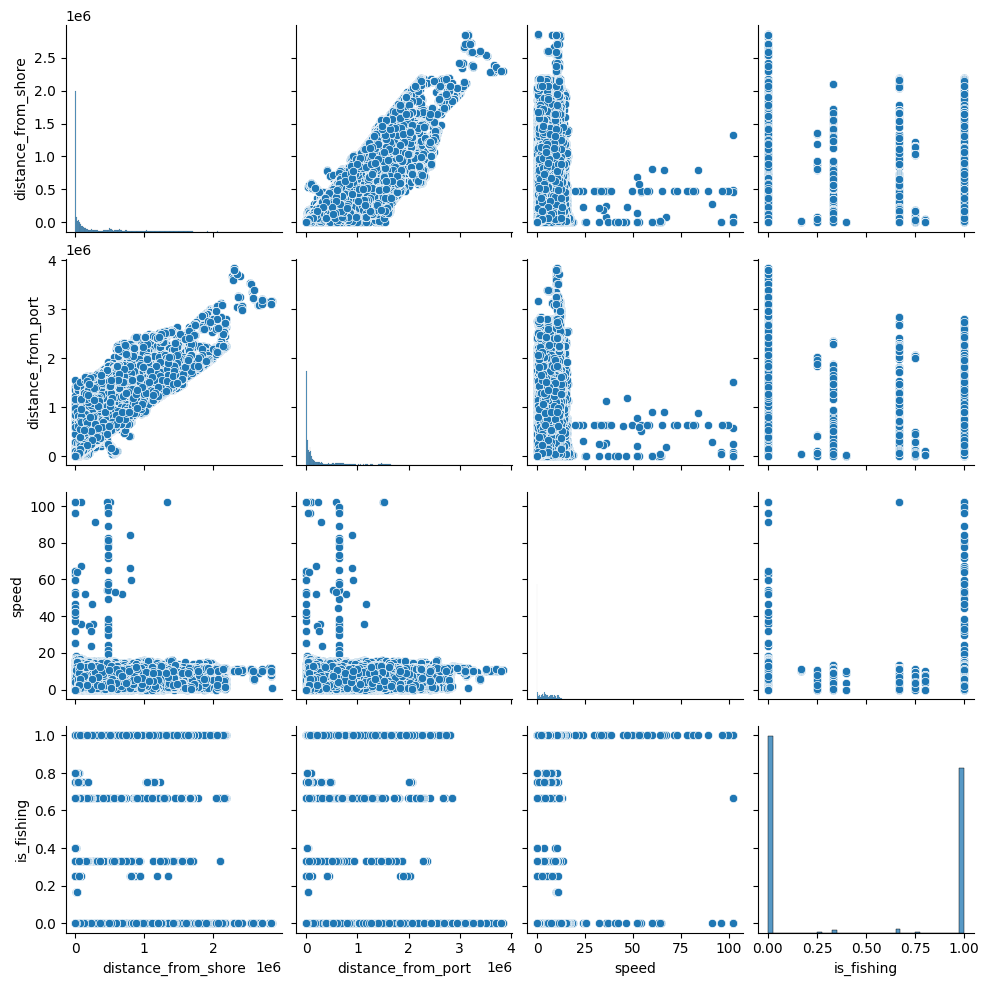

In [41]:
sns.pairplot(df_2.sample(500000)[numerical_columns])

In [94]:
print('******************* Hexagon Resolution Level 7 Analysis ******************* \n')
temp = pd.DataFrame(df_2.groupby('hexagon_coordi_7')['mmsi'].count()).reset_index()
temp.columns = ['hexagon_coordi_7 Index','# of Points']
print('Top 5 Most Crowded Hexagons')
display(temp.sort_values(by='# of Points',ascending=False).head())
print('Descriptive Analysis of # of Points for Each Hexagon')
display(temp.describe())

******************* Hexagon Resolution Level 7 Analysis ******************* 

Top 5 Most Crowded Hexagons


,hexagon_coordi_7 Index,# of Points
27829,87196dd68ffffff,11771
19485,871820ad3ffffff,8197
33657,871f25046ffffff,7969
54735,8755120e2ffffff,6643
35128,871f66d42ffffff,5534


Descriptive Analysis of # of Points for Each Hexagon


,# of Points
count,117891.000000
mean,4.698026
std,72.756653
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,11771.000000


In [87]:
top_5_hex_7_df = df_2[df_2['hexagon_coordi_7'].isin(temp.sort_values(by='# of Points',ascending=False).iloc[0:5]['hexagon_coordi_7 Index'].values)]

In [88]:
top_5_hex_7_df = top_5_hex_7_df[['mmsi','hexagon_coordi_7','is_fishing']]

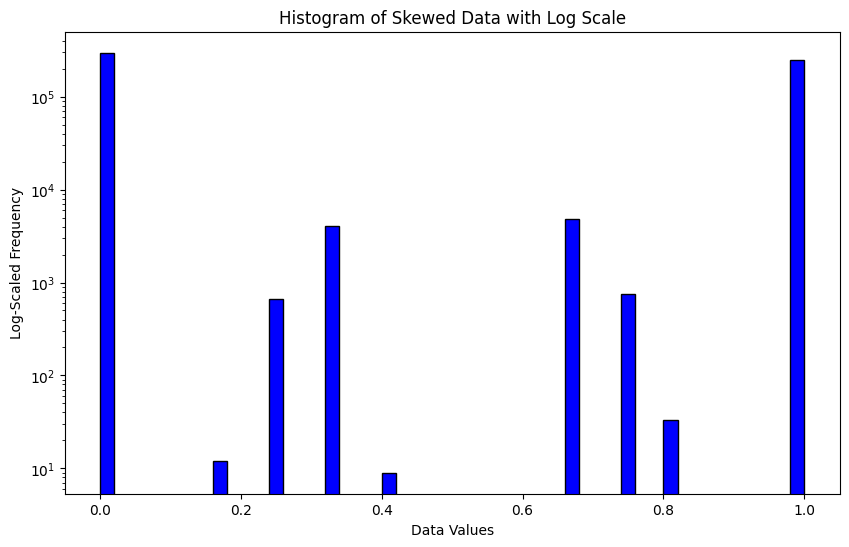

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(df_2['is_fishing'], bins=50, color='blue', edgecolor='black')
plt.yscale('log')  # Applying log scale on the y-axis
plt.title('Histogram of Skewed Data with Log Scale')
plt.xlabel('Data Values')
plt.ylabel('Log-Scaled Frequency')
plt.show()

In [90]:
map_ships.save_to_html(file_name='top_5_hex_7_df.html')

Map saved to top_5_hex_7_df.html!


In [61]:
print('******************* Hexagon Resolution Level 3 Analysis ******************* \n')
temp = pd.DataFrame(df_2.groupby('hexagon_coordi_7_3')['mmsi'].count()).reset_index()
temp.columns = ['hexagon_coordi_7 Index','# of Points']
print('Top 5 Most Crowded Hexagons')
display(temp.sort_values(by='# of Points',ascending=False).head())
print('Descriptive Analysis of # of Points for Each Hexagon')
display(temp.describe())

******************* Hexagon Resolution Level 3 Analysis ******************* 

Top 5 Most Crowded Hexagons


,hexagon_coordi_7 Index,# of Points
571,83196dfffffffff,20115
412,831820fffffffff,10929
774,831f25fffffffff,9470
1743,835512fffffffff,7326
567,831968fffffffff,6525


Descriptive Analysis of # of Points for Each Hexagon


,# of Points
count,4732.000000
mean,117.044590
std,552.746993
min,1.000000
25%,4.000000
50%,15.000000
75%,53.000000
max,20115.000000


In [186]:
most_crowded_hexagon_level_3 = df_2_2[df_2_2['hexagon_coordi_7_3']=='83196dfffffffff']

In [187]:
most_crowded_hexagon_level_3

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,...,hexagon_coordi_7,hexagon_coordi_7_3,course_hex_level_3_avg,is_fishing_hex_level_3_avg,ship_type_hex_level_3_avg,speed_hex_level_3_avg,course_hex_level_7_avg,is_fishing_hex_level_7_avg,ship_type_hex_level_7_avg,speed_hex_level_7_avg
11729,51101297206144.0,2015-01-27 02:42:34,0.0,71342.5,0.0,227.5,53.4,6.2,0.0,gfw,...,87196dd68ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,0.0,0.0,trawlers,0.0
11730,51101297206144.0,2015-01-27 02:55:04,0.0,71342.5,0.0,225.4,53.4,6.2,0.0,gfw,...,87196dd68ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,0.0,0.0,trawlers,0.0
11731,51101297206144.0,2015-01-27 03:07:45,0.0,71342.5,0.0,275.9,53.4,6.2,0.0,gfw,...,87196dd68ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,0.0,0.0,trawlers,0.0
11732,51101297206144.0,2015-01-27 03:19:52,0.0,71342.5,0.0,93.2,53.4,6.2,0.0,gfw,...,87196dd68ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,0.0,0.0,trawlers,0.0
11733,51101297206144.0,2015-01-27 03:32:01,0.0,71342.5,0.0,259.8,53.4,6.2,0.0,gfw,...,87196dd68ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,0.0,0.0,trawlers,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465208,130481650671667.0,2016-01-01 04:35:33,0.0,94808.0,0.0,192.5,52.7,5.6,0.0,gfw,...,87196d6e1ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,290.2,0.0,unknown,0.0
465209,130481650671667.0,2016-01-01 04:36:33,0.0,94808.0,0.0,204.0,52.7,5.6,0.0,gfw,...,87196d6e1ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,290.2,0.0,unknown,0.0
465210,130481650671667.0,2016-01-01 04:42:17,0.0,94808.0,0.0,297.4,52.7,5.6,0.0,gfw,...,87196d6e1ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,290.2,0.0,unknown,0.0
465211,130481650671667.0,2016-01-01 04:50:55,0.0,94808.0,0.0,192.1,52.7,5.6,0.0,gfw,...,87196d6e1ffffff,83196dfffffffff,0.0,0.1,trawlers,0.5,290.2,0.0,unknown,0.0


In [188]:
# Group by month and ship_type, then unstack for plotting
monthly_ship_types = most_crowded_hexagon_level_3.groupby(['month', 'ship_type']).size().unstack(fill_value=0)

# Group by month for is_fishing, assuming it's a binary indicator (0 or 1)
monthly_fishing = most_crowded_hexagon_level_3.groupby('month')['is_fishing'].mean()  # or sum() if you want total counts

# Count records per month
monthly_records = most_crowded_hexagon_level_3.groupby('month').size()


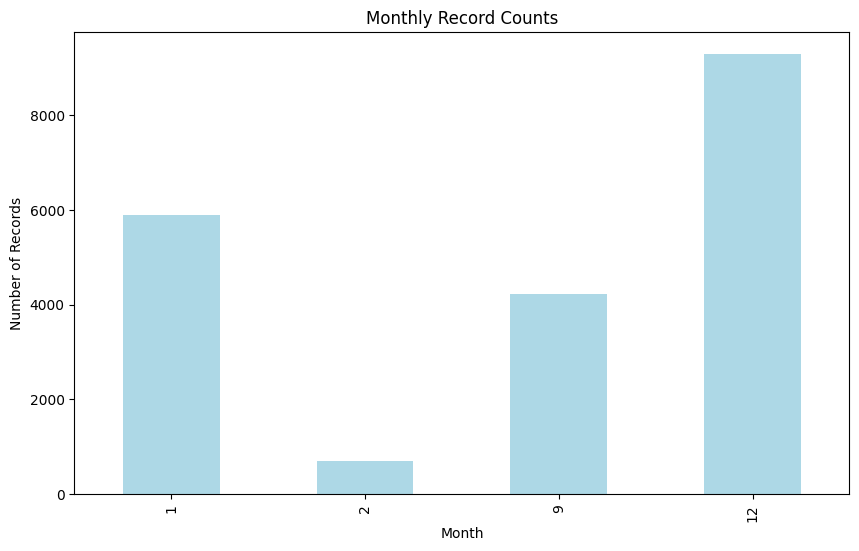

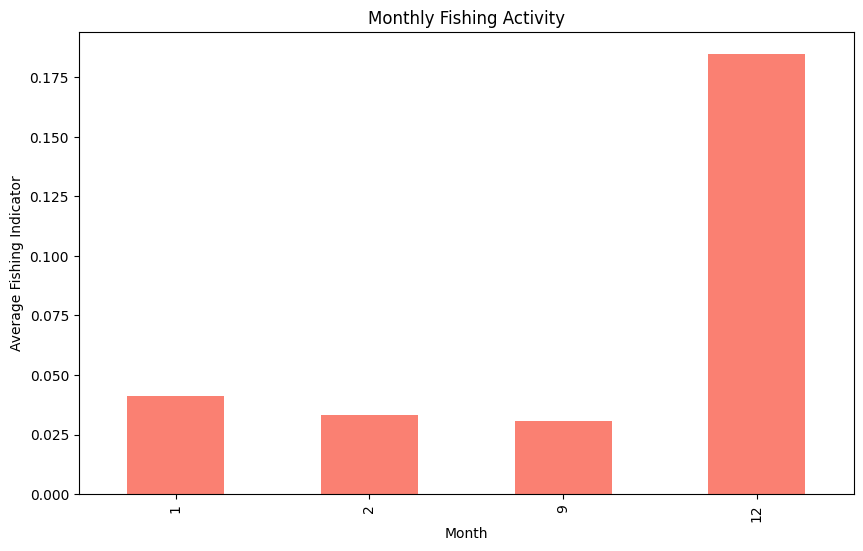

<Figure size 1000x600 with 0 Axes>

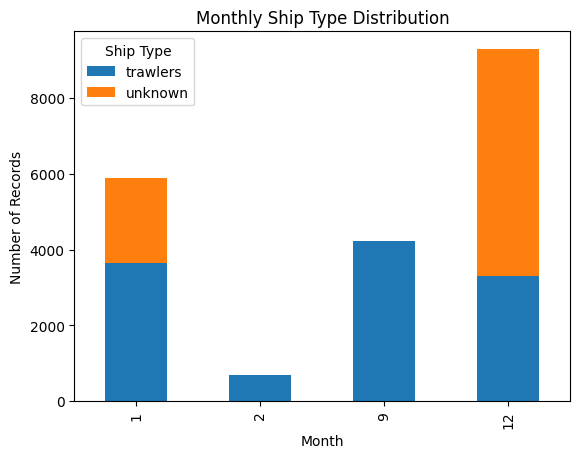

In [191]:
import matplotlib.pyplot as plt

# Plot the monthly record counts
plt.figure(figsize=(10, 6))
monthly_records.plot(kind='bar', color='lightblue')
plt.title('Monthly Record Counts')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.show()

# Plot the monthly fishing activity
plt.figure(figsize=(10, 6))
monthly_fishing.plot(kind='bar', color='salmon')
plt.title('Monthly Fishing Activity')
plt.xlabel('Month')
plt.ylabel('Average Fishing Indicator')
plt.show()

# Plot the distribution of ship types per month as a stacked bar chart
plt.figure(figsize=(10, 6))
monthly_ship_types.plot(kind='bar', stacked=True)
plt.title('Monthly Ship Type Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.legend(title='Ship Type')
plt.show()
